In [53]:
import math
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

from sympy import *
init_printing()
from sympy.abc import i, k, m, n, x


### Finance and Python Syntax
Monte Carlo simulation w/ Black-Scholes-Merton (BSM) set-up

In [42]:
C_0, I, j, sigma, S_T, s_0, r, T, z = symbols('C_0, I, j, sigma, S_T, s_0, r, T, z')
h_T = symbols('h_T', cls=Function)

In [43]:
s_0*exp((r-1/2*sigma**2)*T + sigma*sqrt(T)*z) # BSM index level at maturity

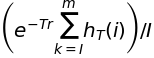

In [45]:
exp(-r*T)*1/I * Sum(h_T(i), (k, I, m)) # Monte Carlo estimator for European option

In [50]:
###Parameters
S0 = 100. # initial stock index level
K = 105. # strike price of the European call option
T = 1 # time to maturity (years)
r = 0.05 # riskless short rate
sigma = 0.2 # constant volatility

I = 100000
np.random.seed(1000)
z = np.random.standard_normal(I)

ST = S0 * np.exp((r - sigma**2 / 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)
C0 = math.exp(-r * T) * np.mean(hT)

print("Value of the European call option: {:5.3f}.".format(C0))

Value of the European call option: 8.019.
